In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm as tqdm
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

In [2]:
# Seed for reproducibility
SEED = 42
np.random.seed(SEED)

# Path to the .npz file
DATASET_PATH = "../MLPC2025_classification"

ANNOTATIONS_PATH = DATASET_PATH + "/annotations.csv"
#ANNOTATIONS_TEXT_EMBEDDINGS_PATH = DATASET_PATH + "/annotations_text_embeddings.npz"

METADATA_PATH = DATASET_PATH + "/metadata.csv"
#METADATA_TITLE_EMBEDDINGS_PATH = DATASET_PATH + "/metadata_title_embeddings.npz"
#METADATA_KEYWORDS_EMBEDDINGS_PATH = DATASET_PATH + "/metadata_keywords_embeddings.npz"

AUDIO_PATHS = DATASET_PATH + "/audio"
AUDIO_FEATURES_PATHS = DATASET_PATH + "/audio_features"

LABELS_PATH = DATASET_PATH + "/labels"

In [3]:
annotations = pd.read_csv(ANNOTATIONS_PATH)
annotations.head()

,task_id,filename,annotator,text,onset,offset,time,original_caption,categories
0,161976549,117126.mp3,1145579747015607221221744067969991550764671773...,An alarm is ringing loudly and repeatedly nearby.,0.000000,10.503064,345.033,Raw loud alarm sound repeatedly ringing nearby,['Alarm']
1,161976549,117126.mp3,1145579747015607221221744067969991550764671773...,An alarm is ringing repeatedly nearby.,12.514616,23.048000,345.033,Clean alarm sound repeatedly ringing nearby,['Alarm']
2,161976550,118234.mp3,5022633589939139634134314703519782680423201448...,An alarm clock is beeping continuously.,0.000000,13.414880,919.016,Alarm clock beeping continuesly,"['Alarm', 'Beep/Bleep']"
3,161976550,118234.mp3,5022633589939139634134314703519782680423201448...,An alarm clock is beeping continuously.,15.134252,28.492000,919.016,Alarm clock beeping continuesly,"['Alarm', 'Beep/Bleep']"
4,161976551,119173.mp3,8105077500224920444298835829881210427871190692...,A car alarm sounds loudly in a steady pattern.,0.000000,20.065604,2162.620,a car alarm sounds loudly in a steady pattern ...,"['Alarm', 'Car']"


In [4]:
# Remove unnecessary columns for this task
annotations = annotations.drop(columns=['task_id'])
annotations['original_index'] = annotations.index
annotations.head()

,filename,annotator,text,onset,offset,time,original_caption,categories,original_index
0,117126.mp3,1145579747015607221221744067969991550764671773...,An alarm is ringing loudly and repeatedly nearby.,0.000000,10.503064,345.033,Raw loud alarm sound repeatedly ringing nearby,['Alarm'],0
1,117126.mp3,1145579747015607221221744067969991550764671773...,An alarm is ringing repeatedly nearby.,12.514616,23.048000,345.033,Clean alarm sound repeatedly ringing nearby,['Alarm'],1
2,118234.mp3,5022633589939139634134314703519782680423201448...,An alarm clock is beeping continuously.,0.000000,13.414880,919.016,Alarm clock beeping continuesly,"['Alarm', 'Beep/Bleep']",2
3,118234.mp3,5022633589939139634134314703519782680423201448...,An alarm clock is beeping continuously.,15.134252,28.492000,919.016,Alarm clock beeping continuesly,"['Alarm', 'Beep/Bleep']",3
4,119173.mp3,8105077500224920444298835829881210427871190692...,A car alarm sounds loudly in a steady pattern.,0.000000,20.065604,2162.620,a car alarm sounds loudly in a steady pattern ...,"['Alarm', 'Car']",4


In [5]:
metadata = pd.read_csv(METADATA_PATH)
metadata.head()

,filename,keywords,freesound_id,sound_link,manufacturer,license,title,description,num_downloads,geotag,start_time_s,end_time_s
0,321771.mp3,"Interior, AMB, Italy, Distant, Speech, Reverb",321771,https://freesound.org/people/Skjor1/sounds/321...,Skjor1,http://creativecommons.org/publicdomain/zero/1.0/,Interior Ambience + Distant Reverberant Speech...,Interior Ambience + Distant Reverberant Speech...,120,NaN,5.200,27.179
1,451371.mp3,"kids, throaty, crowd, India, distant, traffic,...",451371,https://freesound.org/people/kyles/sounds/451371/,kyles,http://creativecommons.org/publicdomain/zero/1.0/,election rally crowd and speech with distant t...,election rally crowd and speech with distant t...,122,NaN,120.800,144.984
2,199414.mp3,"broadcast, speech, radio",199414,https://freesound.org/people/martinimeniscus/s...,martinimeniscus,http://creativecommons.org/publicdomain/zero/1.0/,"Old Radio Speech Background, higher FF125.aif",Background noise for an old radio broadcast sp...,391,NaN,102.003,130.921
3,410952.mp3,"loop2017, atmos, dolby, speech, ableton",410952,https://freesound.org/people/lietoofine/sounds...,lietoofine,https://creativecommons.org/licenses/by/4.0/,dolby atmos speech.wav,dolby atmos speech @Loop2017,193,52.479543 13.500279,31.330,54.021
4,203908.mp3,"dr-40, project, speech, student, italian, reci...",203908,https://freesound.org/people/s9ames/sounds/203...,s9ames,http://creativecommons.org/licenses/by/3.0/,bologna speech Italian2,recorded with a tascam dr-40 in a sound studio...,526,NaN,29.200,45.689


In [6]:
# Remove unnecessary columns for this task
metadata = metadata.drop(columns=['freesound_id', 'sound_link', 'manufacturer', 'license', 'num_downloads', 'geotag', 'start_time_s', 'end_time_s'])
metadata.head()

,filename,keywords,title,description
0,321771.mp3,"Interior, AMB, Italy, Distant, Speech, Reverb",Interior Ambience + Distant Reverberant Speech...,Interior Ambience + Distant Reverberant Speech...
1,451371.mp3,"kids, throaty, crowd, India, distant, traffic,...",election rally crowd and speech with distant t...,election rally crowd and speech with distant t...
2,199414.mp3,"broadcast, speech, radio","Old Radio Speech Background, higher FF125.aif",Background noise for an old radio broadcast sp...
3,410952.mp3,"loop2017, atmos, dolby, speech, ableton",dolby atmos speech.wav,dolby atmos speech @Loop2017
4,203908.mp3,"dr-40, project, speech, student, italian, reci...",bologna speech Italian2,recorded with a tascam dr-40 in a sound studio...


In [7]:
# Load audio features
all_audio_file_basenames = [os.path.splitext(os.path.basename(name))[0] for name in os.listdir(AUDIO_PATHS) if name.endswith('.mp3')]
all_audio_file_features = {}
for audio_file_basename in tqdm(all_audio_file_basenames):
    features_path = os.path.join(AUDIO_FEATURES_PATHS, audio_file_basename + '.npz')
    features = dict(np.load(features_path))
    all_audio_file_features[audio_file_basename] = features

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8230/8230 [00:22<00:00, 364.01it/s]


In [8]:
# Load audio labels
all_audio_file_basenames = [os.path.splitext(os.path.basename(name))[0] for name in os.listdir(AUDIO_PATHS) if name.endswith('.mp3')]
all_audio_file_labels = {}
for audio_file_basename in tqdm(all_audio_file_basenames):
    labels_path = os.path.join(LABELS_PATH, audio_file_basename + '_labels.npz')
    labels = dict(np.load(labels_path))
    all_audio_file_labels[audio_file_basename] = labels

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8230/8230 [00:53<00:00, 153.67it/s]


In [9]:
example_audio_file = all_audio_file_basenames[0]
example_audio_features = all_audio_file_features[example_audio_file]
example_audio_labels = all_audio_file_labels[example_audio_file]

all_audio_feature_names = list(example_audio_features.keys())
all_audio_label_names = list(example_audio_labels.keys())

print(f'All audio features: n={len(all_audio_feature_names)}')
print(f'\t{all_audio_feature_names}')

print(f'\nAll audio labels: n={len(all_audio_label_names)}')
print(f'\t{all_audio_label_names}')

All audio features: n=13
	['embeddings', 'melspectrogram', 'mfcc', 'mfcc_delta', 'mfcc_delta2', 'flatness', 'centroid', 'flux', 'energy', 'power', 'bandwidth', 'contrast', 'zerocrossingrate']

All audio labels: n=58
	['Airplane', 'Alarm', 'Beep/Bleep', 'Bell', 'Bicycle', 'Bird Chirp', 'Bus', 'Car', 'Cat Meow', 'Chainsaw', 'Clapping', 'Cough', 'Cow Moo', 'Cowbell', 'Crying', 'Dog Bark', 'Doorbell', 'Drip', 'Drums', 'Fire', 'Footsteps', 'Guitar', 'Hammer', 'Helicopter', 'Hiccup', 'Horn Honk', 'Horse Neigh', 'Insect Buzz', 'Jackhammer', 'Laughter', 'Lawn Mower', 'Motorcycle', 'Piano', 'Pig Oink', 'Power Drill', 'Power Saw', 'Rain', 'Rooster Crow', 'Saxophone', 'Sewing Machine', 'Sheep/Goat Bleat', 'Ship/Boat', 'Shout', 'Singing', 'Siren', 'Sneeze', 'Snoring', 'Speech', 'Stream/River', 'Thunder', 'Train', 'Truck', 'Trumpet', 'Vacuum Cleaner', 'Violin', 'Washing Machine', 'Waves', 'Wind']


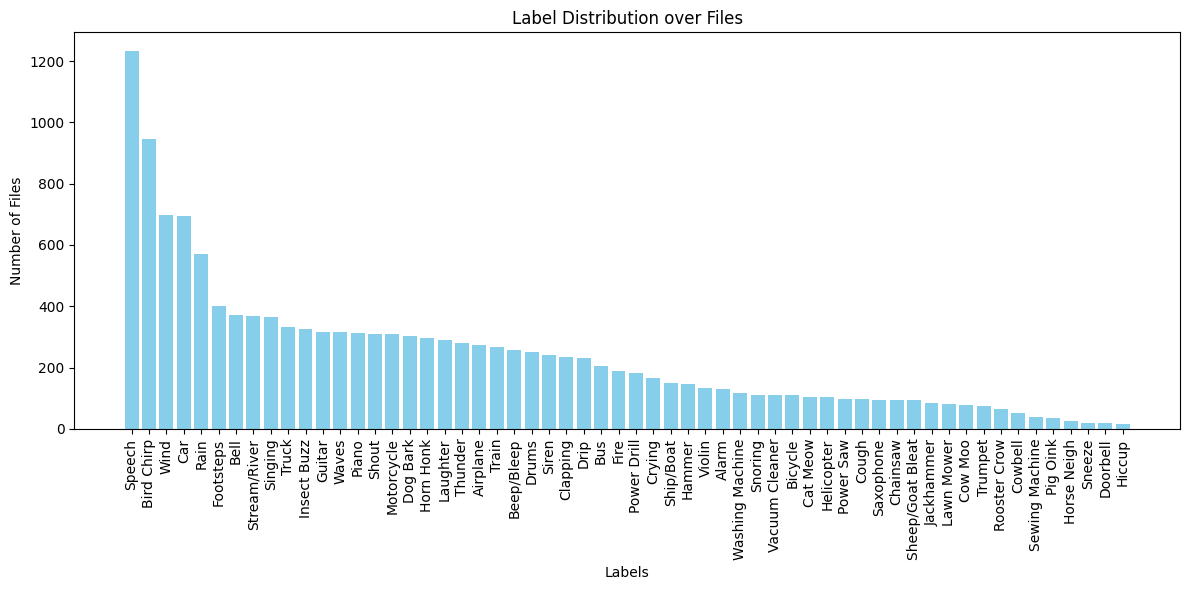

In [10]:
# Check label distribution
files_per_label = {label_name: 0 for label_name in all_audio_label_names}
for audio_file_basename in all_audio_file_basenames:
    for label_name, label_values in all_audio_file_labels[audio_file_basename].items():
        if np.sum(label_values) > 0:
            files_per_label[label_name] += 1

label_counts = sorted(list(files_per_label.items()), key=lambda x: x[1], reverse=True)

labels = [label for label, count in label_counts]
counts = [count for label, count in label_counts]

plt.figure(figsize=(12, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Number of Files')
plt.title('Label Distribution over Files')
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig("./report/figs/2_Label Distribution over Files.png", bbox_inches='tight', dpi=600)

plt.show()

Idea for splitting the data:

Use some fixed percentages for training, validation, and test sets (e.g., 70% training, 15% validation, 15% test).
Then, for each label, ensure that the same percentage of files is allocated to each set. This way, you maintain the label distribution across all sets.

Additionally, some resampling (e.g. SMOTE), undersampling (e.g. RUS, TOMEK) or class weighting techniques can be applied to maintain balance during training.

In [11]:
class AudioClassificationDataset(Dataset):

    def __init__(self, data_dir, audio_features_subset, return_snippets, context_length, testing):
        """
        data_dir: Path to the dataset directory
        audio_features_subset: List of audio features to be used
        return_snippets: If False, return whole files, if True, return snippets of size context_length
        context_length: Length of the snippets to be returned (ideally uneven number)
        testing: If True, use a small subset of the audio files for testing
        """

        self.return_snippets = return_snippets
        self.context_length = context_length

        audio_path = os.path.join(data_dir, 'audio')

        # For testing purposes, use a smaller subset of the audio files (just copy some audio files from the audio directory
        # to a new directory at the same level)
        #audio_path = os.path.join(data_dir, 'audio_subset_test')

        self.audio_file_basenames = [os.path.splitext(os.path.basename(name))[0] for name in os.listdir(audio_path) if name.endswith('.mp3')]
        self.audio_file_features = []
        self.audio_file_labels = []

        for audio_file_idx, audio_file_basename in enumerate(tqdm(self.audio_file_basenames)):

            # Remove unwanted features and store remaining features
            audio_features_dict = dict(np.load(os.path.join(data_dir, 'audio_features', audio_file_basename + '.npz')))
            audio_features = [audio_features_dict[wanted_feature] for wanted_feature in audio_features_subset]

            n_frames = audio_features[0].shape[0]

            # store whole file at once
            if not self.return_snippets:
                self.audio_file_features.append(audio_features)
            # store single snippets
            else:
                # Pad so that edge-frames have context
                padding = ((context_length//2, context_length//2), (0, 0))
                audio_features = [np.pad(array=feature, pad_width=padding, mode='constant', constant_values=0) for feature in audio_features]

                for frame_idx in range(n_frames):
                    frame_features = [audio_feature[frame_idx:frame_idx + context_length] for audio_feature in audio_features]
                    self.audio_file_features.append((audio_file_idx, frame_idx, frame_features))

            # Store labels
            audio_labels_dict = dict(np.load(os.path.join(data_dir, 'labels', audio_file_basename + '_labels.npz')))

            n_labels = len(audio_labels_dict.keys())
            file_labels = np.zeros((n_frames, n_labels))
            for i, (label_name, label_values) in enumerate(audio_labels_dict.items()):

                # If there are multiple label sets -> multiple annotators
                if label_values.shape[1] != 1:
                    # Like discussed in the exercise class, we choose one at random
                    label_values = label_values[:, np.random.randint(0, label_values.shape[1]), np.newaxis]

                file_labels[:, i] = label_values[:, 0]

            # store labels for whole file at once
            if not self.return_snippets:
                self.audio_file_labels.append(file_labels)
            # store labels for single snippets
            else:
                for frame_idx, frame_labels in enumerate(file_labels):
                    self.audio_file_labels.append((audio_file_idx, frame_idx, frame_labels))

            if testing and audio_file_idx == 1000:
                break

    def __len__(self):
            return len(self.audio_file_labels)

    def __getitem__(self, idx):
        if not self.return_snippets:
            return self.audio_file_basenames[idx], self.audio_file_features[idx], self.audio_file_labels[idx]
        else:
            file_idx, frame_idx, frame_features = self.audio_file_features[idx]
            file_idx, frame_idx, frame_labels = self.audio_file_labels[idx]
            return file_idx, self.audio_file_basenames[file_idx], frame_idx, frame_features, frame_labels

In [12]:
data = AudioClassificationDataset(
    data_dir = DATASET_PATH,
    audio_features_subset = ['mfcc', 'melspectrogram'],
    return_snippets = True,
    context_length = 3,
    testing = False
)
print(f"Dataset size: {len(data)}")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8230/8230 [01:09<00:00, 118.11it/s]

Dataset size: 1538577


In [25]:
# Check label distribution in the frames
frames_per_label = {label_name: 0 for label_name in all_audio_label_names}
for frame_name in data.audio_file_labels:
    for index, label_name_value in enumerate(frame_name[2]):
        if label_name_value > 0:
            frames_per_label[all_audio_label_names[index]] += 1

print(f"frames_per_label length = {len(frames_per_label)}")
n_frames_per_label = 0
for label_name in frames_per_label:
    n_frames_per_label += frames_per_label[label_name]
#print(f"sum of frames_per_label {np.sum(list(frames_per_label))}")
print(f"sum of frames_per_label {n_frames_per_label}")


frames_per_label length = 58
sum of frames_per_label 1857469


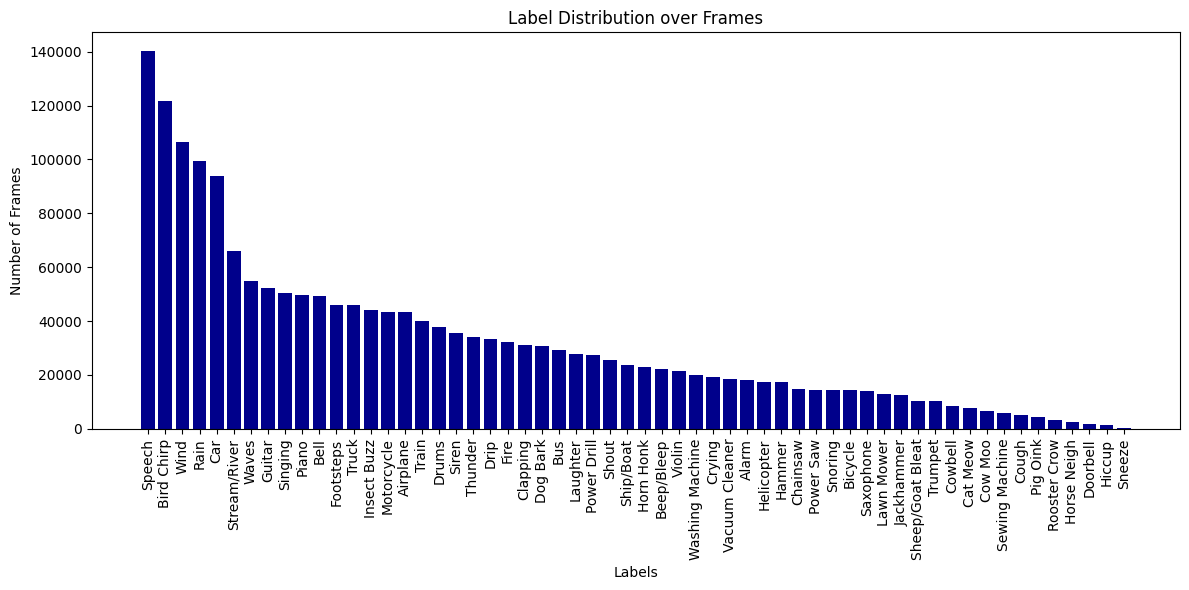

In [27]:
# Plot label distribution in the frames

label_counts = sorted(list(frames_per_label.items()), key=lambda x: x[1], reverse=True)

labels = [label for label, count in label_counts]
counts = [count for label, count in label_counts]

plt.figure(figsize=(12, 6))
plt.bar(labels, counts, color='darkblue')
plt.xlabel('Labels')
plt.ylabel('Number of Frames')
plt.title('Label Distribution over Frames')
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig("./report/figs/2_Label Distribution over Frames.png", bbox_inches='tight', dpi=600)

plt.show()

In [17]:
def custom_train_test_split(custom_dataset, val_size=0.2, test_size=0.2):
    # Creates a dataset split for training, validation and test set, while keeping contents from one file contained in one set,
    # like was discussed in the exercise session

    n_files = len(custom_dataset.audio_file_basenames)
    dataset_size = len(custom_dataset)

    if custom_dataset.return_snippets:

        # For each file get the index of the first frame
        file_start_end_index_dict = {}

        for idx, (file_idx, frame_idx, _) in enumerate(custom_dataset.audio_file_labels):
            if idx == 0 and frame_idx == 0:
                file_start_end_index_dict[file_idx] = [idx, None]
            elif idx != 0 and frame_idx == 0:
                file_start_end_index_dict[file_idx] = [idx, None]
                file_start_end_index_dict[file_idx-1][1] = idx
            elif idx == dataset_size - 1:
                file_start_end_index_dict[file_idx][1] = idx

        # Get indices of files for which to include the snippets in the splits
        file_indices = list(range(n_files))
        np.random.shuffle(file_indices)
        shuffled_file_indices = file_indices

        train_size_files = n_files - int(n_files * (val_size + test_size))
        val_size_files = int(n_files * val_size)

        train_file_indices = shuffled_file_indices[:train_size_files]
        val_file_indices = shuffled_file_indices[train_size_files:(train_size_files+val_size_files)]
        test_file_indices = shuffled_file_indices[(train_size_files+val_size_files):]

        # For each file index in the lists get corresponding indices of the snippets
        indices = []
        for i, file_indices in enumerate([train_file_indices, val_file_indices, test_file_indices]):
            indices.append([])
            for file_idx in file_indices:
                start_idx, end_idx = file_start_end_index_dict[file_idx]
                indices[i].extend(list(range(start_idx, end_idx)))

        train_indices = indices[0]
        val_indices = indices[1]
        test_indices = indices[2]


    else: # 1 to 1 correspondence between files and dataset entries
        indices = list(range(dataset_size))
        np.random.shuffle(indices)
        shuffled_indices = indices

        train_size = dataset_size - int(dataset_size * (val_size + test_size))
        val_size = int(dataset_size * val_size)

        train_indices = shuffled_indices[:train_size]
        val_indices = shuffled_indices[train_size:(train_size+val_size)]
        test_indices = shuffled_indices[(train_size+val_size):]


    return train_indices, val_indices, test_indices

In [26]:
train, test, val = custom_train_test_split(data, val_size=0.2, test_size=0.2)
print("Train, test and validation set sizes:")
print(f"-Train: {len(train)}")
print(f"-Test: {len(test)}")
print(f"-Validation: {len(val)}")

Train, test and validation set sizes:
-Train: 923744
-Test: 304650
-Validation: 310182


In [27]:
print("This is what the data looks like:")
for i, idx in enumerate(train):
    if data.return_snippets == False:
        audio_name, features, labels = data[idx]
        print(f"Name: {audio_name}, Feature dim: {[f.shape for f in features]}, Label dim: {labels.shape}")
    elif data.return_snippets == True:
        file_idx, audio_name, frame_idx, features, labels = data[idx]
        print(f"Name: {audio_name}, Frame: {frame_idx}, Feature dim: {[f.shape for f in features]}, Label dim: {labels.shape}")

    if i > 1000:
        break


This is what the data looks like:
Name: 636862, Frame: 0, Feature dim: [(3, 32), (3, 64)], Label dim: (58,)
Name: 636862, Frame: 1, Feature dim: [(3, 32), (3, 64)], Label dim: (58,)
Name: 636862, Frame: 2, Feature dim: [(3, 32), (3, 64)], Label dim: (58,)
Name: 636862, Frame: 3, Feature dim: [(3, 32), (3, 64)], Label dim: (58,)
Name: 636862, Frame: 4, Feature dim: [(3, 32), (3, 64)], Label dim: (58,)
Name: 636862, Frame: 5, Feature dim: [(3, 32), (3, 64)], Label dim: (58,)
Name: 636862, Frame: 6, Feature dim: [(3, 32), (3, 64)], Label dim: (58,)
Name: 636862, Frame: 7, Feature dim: [(3, 32), (3, 64)], Label dim: (58,)
Name: 636862, Frame: 8, Feature dim: [(3, 32), (3, 64)], Label dim: (58,)
Name: 636862, Frame: 9, Feature dim: [(3, 32), (3, 64)], Label dim: (58,)
Name: 636862, Frame: 10, Feature dim: [(3, 32), (3, 64)], Label dim: (58,)
Name: 636862, Frame: 11, Feature dim: [(3, 32), (3, 64)], Label dim: (58,)
Name: 636862, Frame: 12, Feature dim: [(3, 32), (3, 64)], Label dim: (58,)
N

In [28]:
# Some files have multiple label sets, will probably be fixed/explained in the next session (most likely the ones with multiple annotators)
special_count = {}
for file_name, label_dict in all_audio_file_labels.items():
    special = 0
    for label_name, label in label_dict.items():
        if label.shape[1] != 1:
            special = label.shape[1]
    if special:
        try:
            special_count[special] += 1
        except KeyError:
            special_count[special] = 1

    special = 0

for n_label_sets, count in special_count.items():
    print(f"Number of files with {n_label_sets} label sets: {count}")
# Already fixed now in the dataset class

Number of files with 2 label sets: 642
Number of files with 3 label sets: 6
